In [177]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (9.0, 9.0)

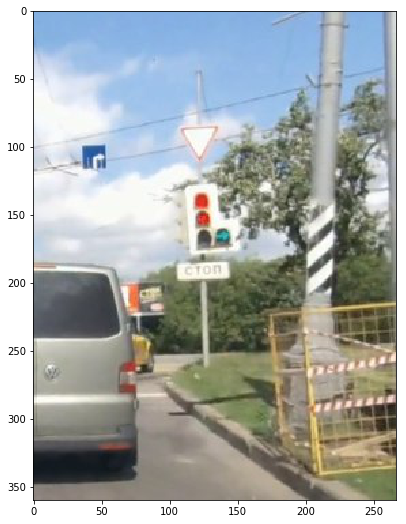

In [178]:
img = cv2.imread('vis1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [253]:
BACKGROUND_THRESHOLD = 200

In [224]:
def get_horizontal_map(img, mode='gray'):
    new_img = np.zeros(img.shape[:2])
    for i, row in enumerate(img):
        new_img[i] = coded_row(get_interesting_points(row, mode), len(row))
    return new_img

In [235]:
def get_vertical_map(img, mode='gray'):
    if mode == 'rgb':
        return np.transpose(get_horizontal_map(np.transpose(img,axes=[1,0,2]), mode),axes=[1,0])
    else:
        return np.transpose(get_horizontal_map(np.transpose(img,axes=[1,0]), mode),axes=[1,0])        

In [236]:
def coded_row(interesting_points, length):
    background = interesting_points[0]
    interesting_points.append(length)
    interesting_points.pop(0)
    index = 0
    result = np.zeros((length))
    '''каждому пикселю поставить в соответствие число - 
    расстояние до границы (по вертикали и по горизонтали),
    отрицательные значения - мы на фоне и удаляемся от границы'''
    for i in interesting_points:
        
        if background:
            result[index: i - (i-index)//2] = [-x for x in list(reversed(range(index, i - (i-index)//2)))]
            result[index + (i-index)//2: i] = list(reversed(range(index + (i-index)//2, i)))
        else:   
            result[index: i - (i-index)//2] = list(reversed(range(index, i - (i-index)//2)))
            result[index + (i-index)//2: i] = list(reversed(range(index + (i-index)//2, i)))

        background = not background
        index = i
    return result

In [237]:
def get_interesting_points(row, mode='rgb'):
    points = []
    if mode == 'rgb':
        nrow = np.apply_along_axis(lambda x: np.linalg.norm(x), 1, row)
    else:
        nrow = row
    
    if np.max(nrow) <= 1.:
        nrow = nrow * 255
    points.append(is_background(nrow[0]))
    for i in range(len(nrow) - 1):
        if is_background(nrow[i]) != is_background(nrow[i + 1]):
            points.append(i)
            
    return points

In [238]:
def is_background(pixel):
    return pixel <= BACKGROUND_THRESHOLD

In [239]:
hor_map = get_horizontal_map(img, mode = 'rgb')
ver_map = get_vertical_map(img, mode = 'rgb')

In [261]:
BACKGROUND_THRESHOLD = 122

In [262]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
v_channel = hsv[:,:,2]
hor_map = get_horizontal_map(v_channel)
ver_map = get_vertical_map(v_channel)
hsv[:,:,2] = hor_map
hor_map = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

hsv[:,:,2] = ver_map
ver_map = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

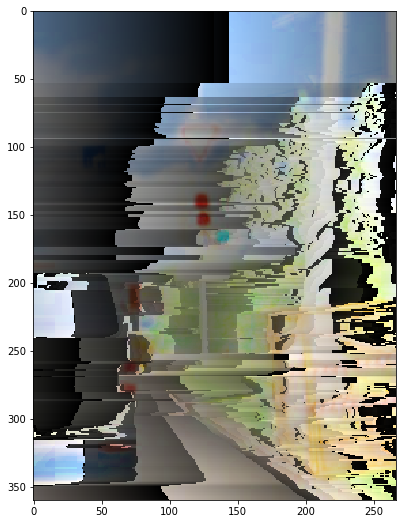

In [263]:
plt.imshow(hor_map, cmap='gray')

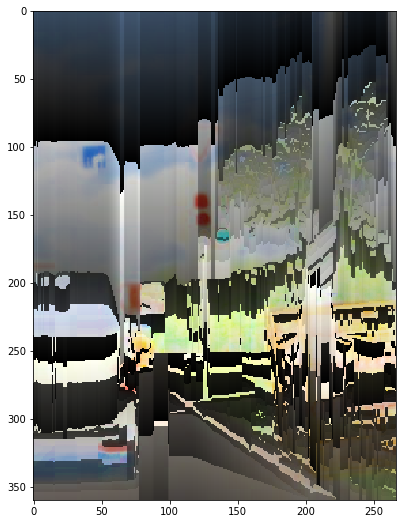

In [264]:
plt.imshow(ver_map, cmap='gray')